# Varia

**IN PROGRESS, come back here after some time**

In this chapter we will look into different architectures and saliency.

## Saliency

Let's start with pretrained NN for MNIST.

In [1]:
import pickle
import gzip
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
model = keras.models.load_model('flatland_model.h5', compile=False)

In [3]:
def get_saliency_map(model, image, class_idx):
    image = tf.convert_to_tensor(image)
    
    with tf.GradientTape() as tape:
        tape.watch(image)
        predictions = model(image)
        loss = predictions[:, class_idx]
    
    # Get the gradients of the loss w.r.t to the input image
    gradient = tape.gradient(loss, image)
        
    return gradient

    # take maximum across channels
    gradient = tf.reduce_max(gradient, axis=-1)
    
    print(gradient.shape)
    
    # convert to numpy
    gradient = gradient.numpy()
    
    # normaliz between 0 and 1
    min_val, max_val = np.min(gradient), np.max(gradient)
    smap = (gradient - min_val) / (max_val - min_val + keras.backend.epsilon())
    
    return smap

In [4]:
X, y = pickle.load(gzip.open('flatland_train.data', 'rb'))

y[y != 0] -= 2
X = X / 255

In [5]:
chopped_model = keras.models.Model(inputs=model.inputs, outputs=model.layers[-3].output)

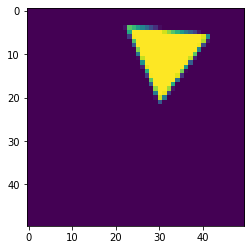

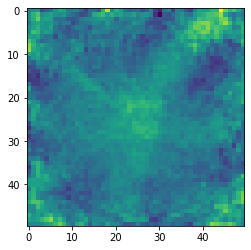

In [6]:
idx = 5

plt.imshow(X[idx])
plt.show()

gradients = get_saliency_map(chopped_model, X[[idx]], int(y[idx])).numpy()[0]
plt.imshow(gradients)
plt.show()

In [7]:
# !pipenv install keras-vis --skip-lock

Installing keras-vis…
Adding keras-vis to Pipfile's [packages]…
✔ Installation Succeeded 
Installing dependencies from Pipfile…
  🐍   ▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉ 0/0 — 00:00:00


In [8]:
from vis.visualization import visualize_saliency
from vis.utils import utils

ImportError: cannot import name '_Conv' from 'keras.layers.convolutional' (/Users/trokas/.local/share/virtualenvs/current-rcFo7dEP/lib/python3.7/site-packages/keras/layers/convolutional.py)

In [ ]:
model.layers[-1].activation = keras.activations.linear
model = utils.apply_modifications(model)  

In [ ]:
visualization = visualize_saliency(model, layer_index, filter_indices=input_class, seed_input=input_image)

## Architectures

There are a lot of possible architectures, we have only touched the surface. Take a glympse at the variations of Neural Networks [here](https://towardsdatascience.com/the-mostly-complete-chart-of-neural-networks-explained-3fb6f2367464).

<img src="https://miro.medium.com/max/2000/1*cuTSPlTq0a_327iTPJyD-Q.png" style="width: 80%"/>

Interesting fact: using Autoencoders we can easily replicate SVD and PCA! We will try this out in the lecture.

### Autoencoders

### Word2Vec